TODO:

PCA

Removing outliers

Streamlining analysis with scikit

Adding also tensorflow/keras

In [140]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt

In [141]:
def plot_categorical(feature,label,df,figsize=(12,8)):
    plt.figure(figsize=figsize)

    grouped=df.groupby(feature)
    labels=[]
    data=[]
    for name,group in grouped:
        labels.append(name)
        data.append(group[label])
    plt.boxplot(data,labels=labels)
    plt.xlabel(feature)
    plt.ylabel(label)
    plt.show()

Feature engineering function:

In [142]:
def feat_eng(df):
    return df

# Real estate price prediction

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Notes: lots of columns -> possible PCA? (see ml-basic-> clustering tutorial for info on PCA with sklearn)

In [143]:
train=pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [144]:
count=train.isna().sum()
count=pd.DataFrame(count)
count[count[0]!=0]

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [145]:
test=pd.read_csv('test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [146]:
features=test.keys()
print(features)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [147]:
cat_features=[ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']
numeric_features=[]

In [148]:
label='SalePrice'

In [149]:
feature='MSSubClass'
#grouped.get_group()

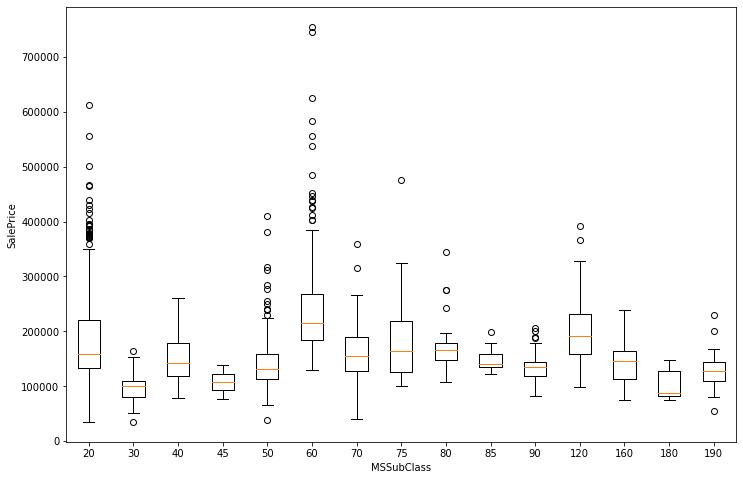

In [150]:
feature='MSSubClass'

plot_categorical(feature,label,train)

In [151]:
grouped=train.groupby(feature).groups
len(grouped)

15

#### Plotting raw features

##### Plotting numeric features

In [152]:
plot=True

LotFrontage 0


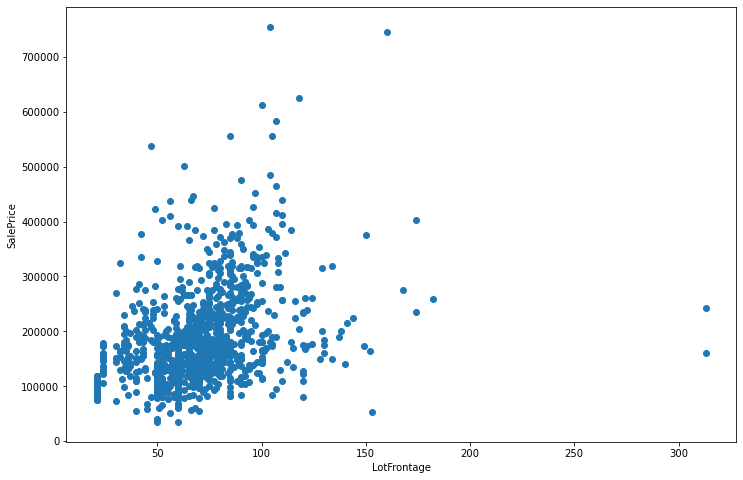

LotArea 1


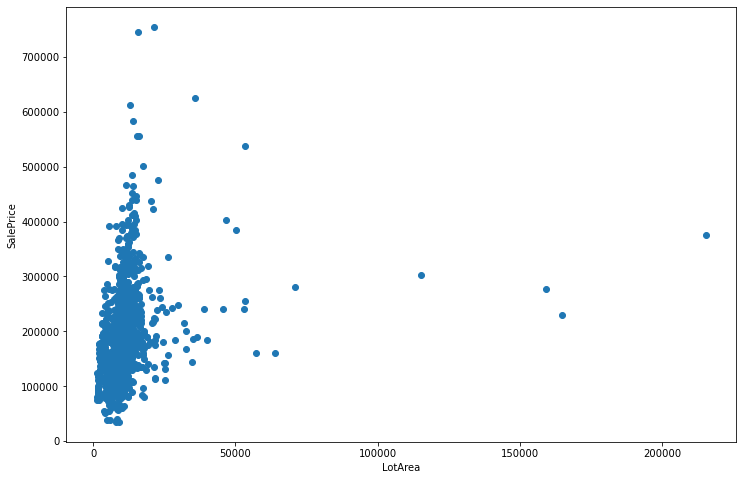

Neighborhood 2


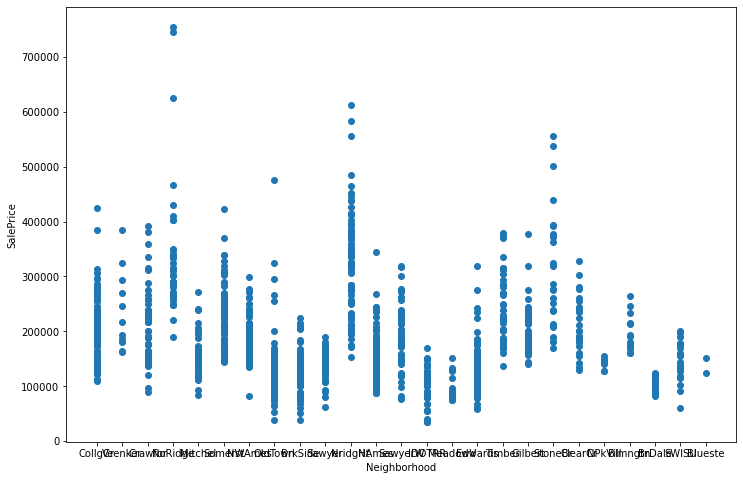

YearBuilt 3


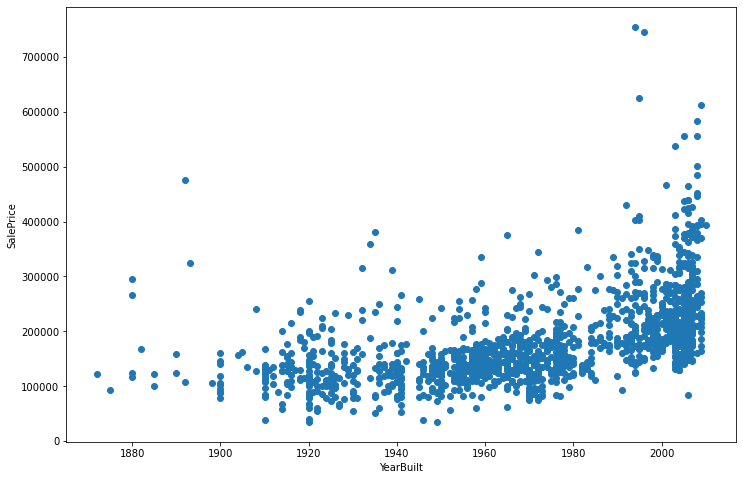

YearRemodAdd 4


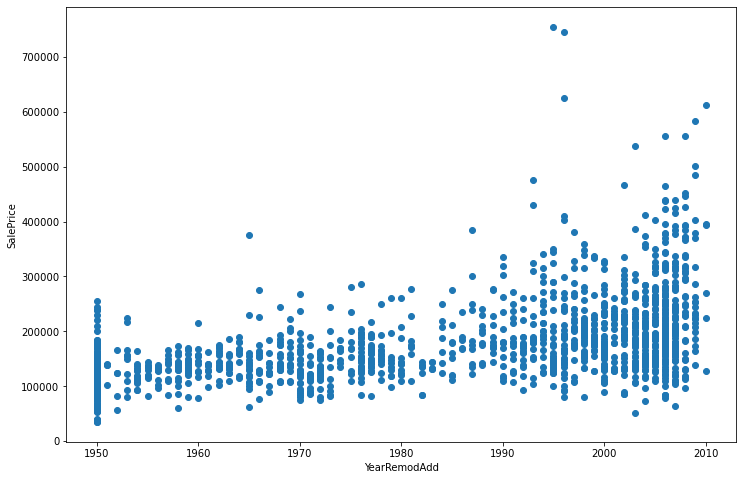

MasVnrArea 5


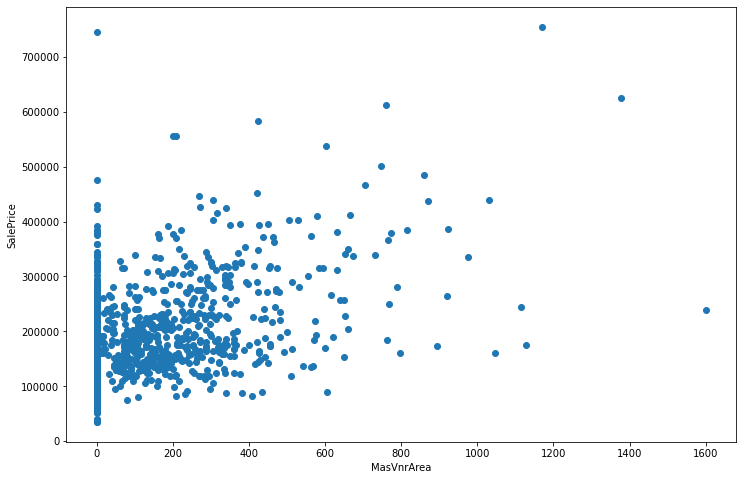

BsmtFinSF1 6


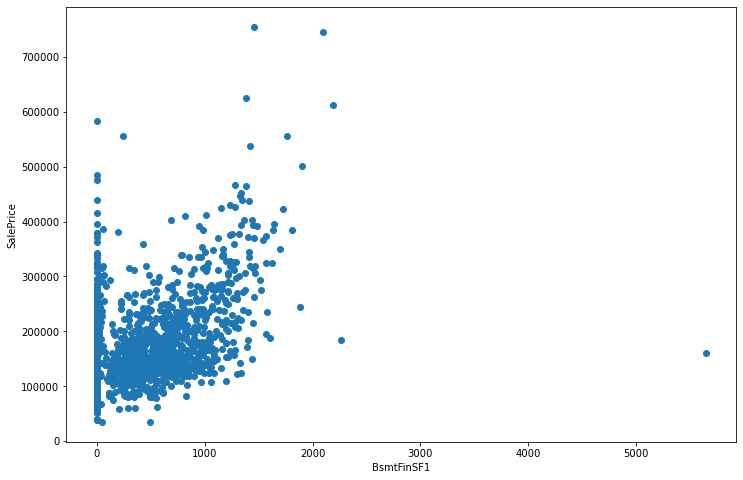

BsmtFinSF2 7


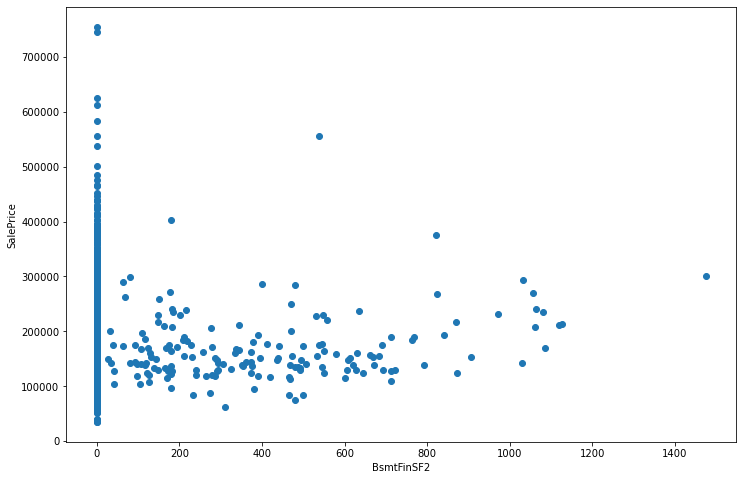

BsmtUnfSF 8


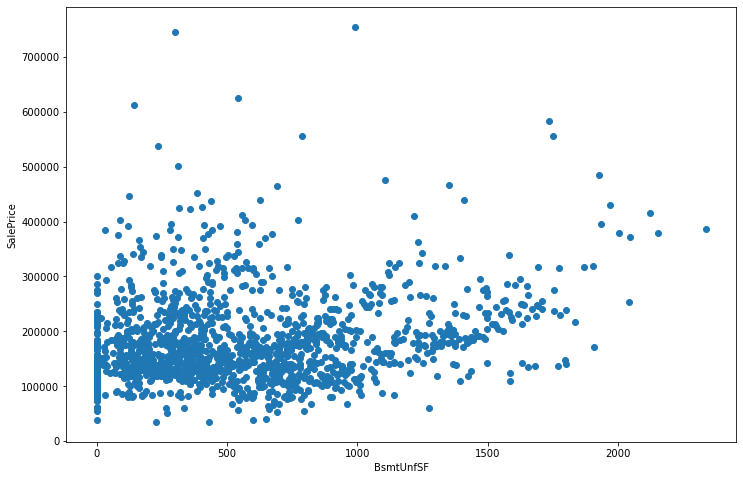

TotalBsmtSF 9


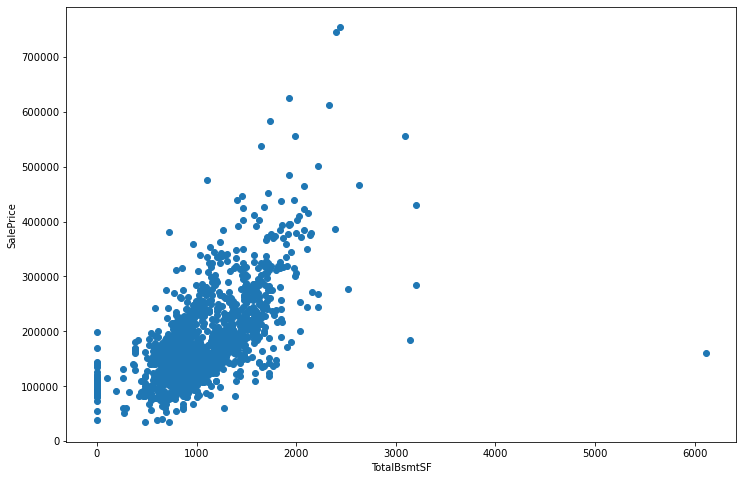

1stFlrSF 10


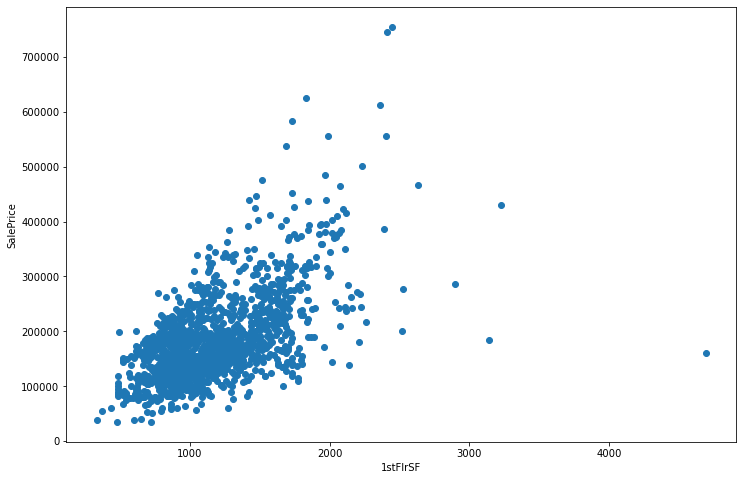

2ndFlrSF 11


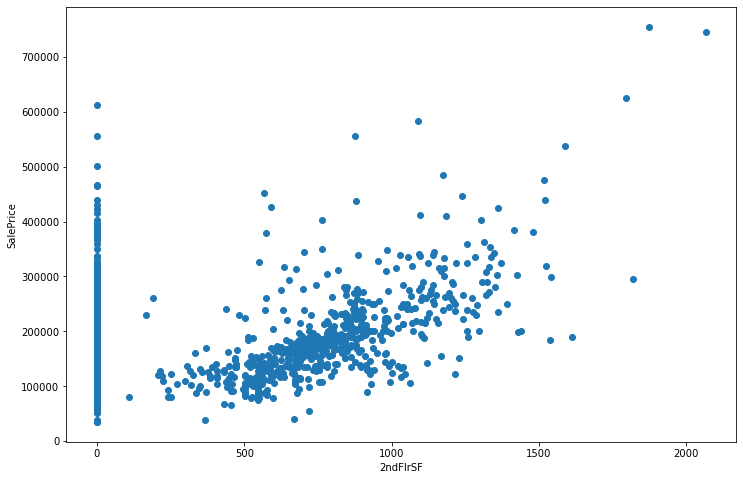

LowQualFinSF 12


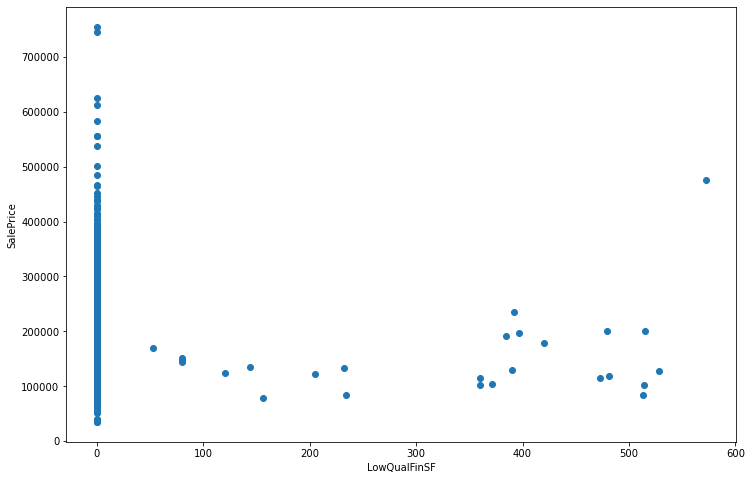

GrLivArea 13


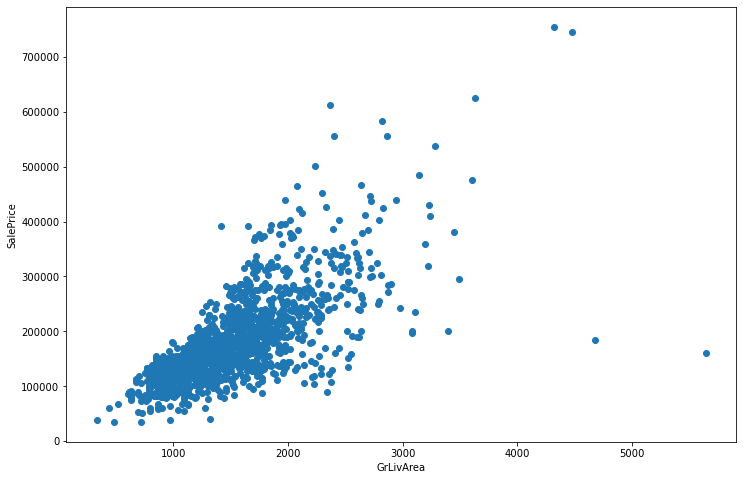

GarageYrBlt 14


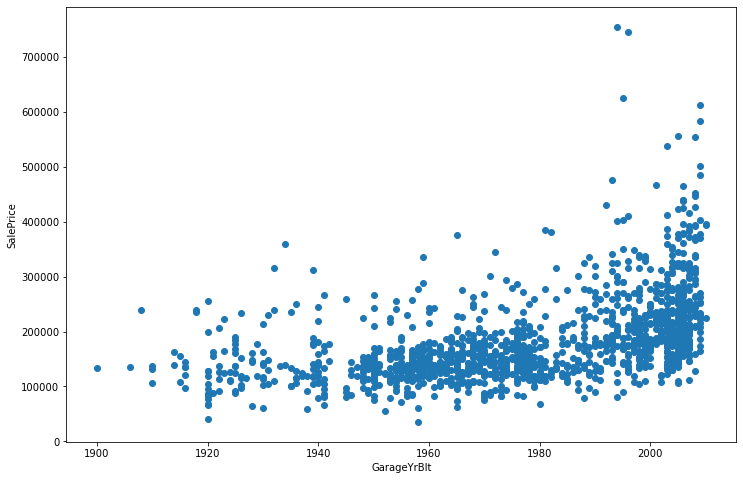

GarageArea 15


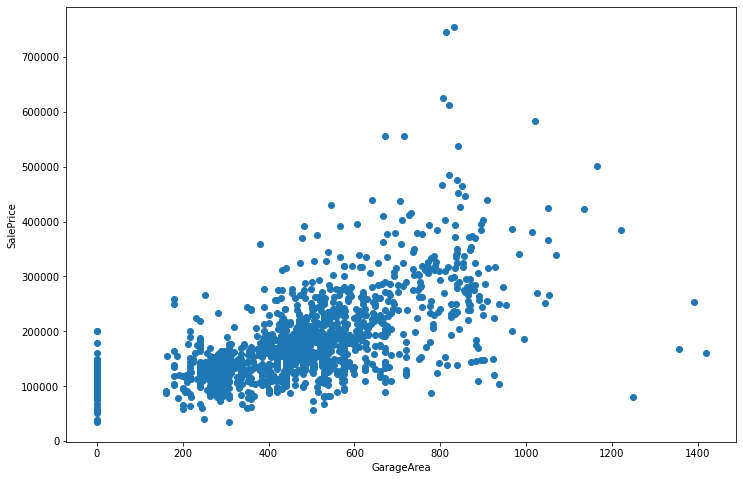

WoodDeckSF 16


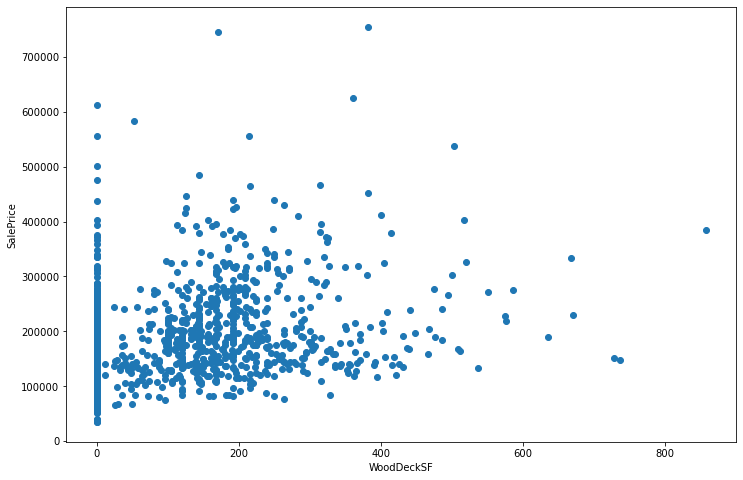

OpenPorchSF 17


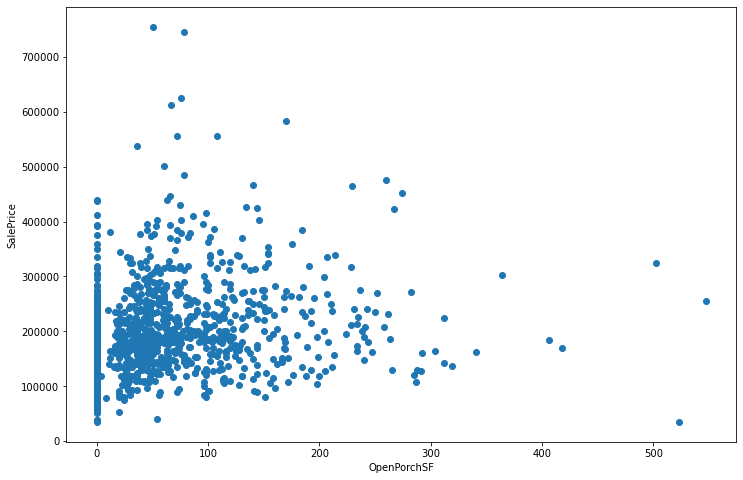

EnclosedPorch 18


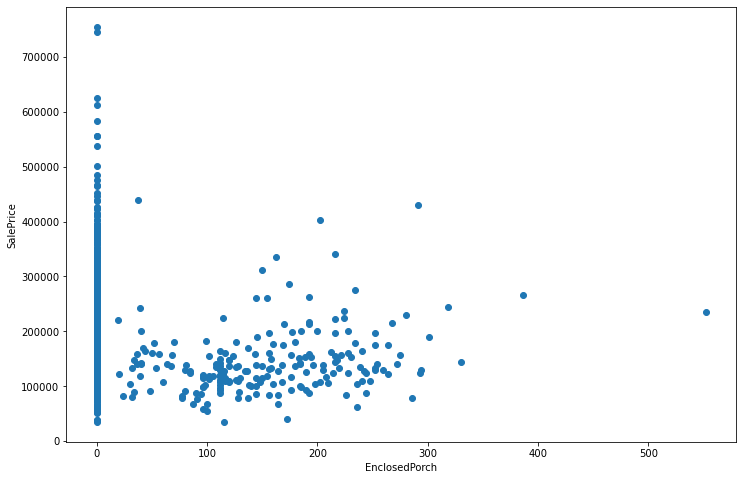

3SsnPorch 19


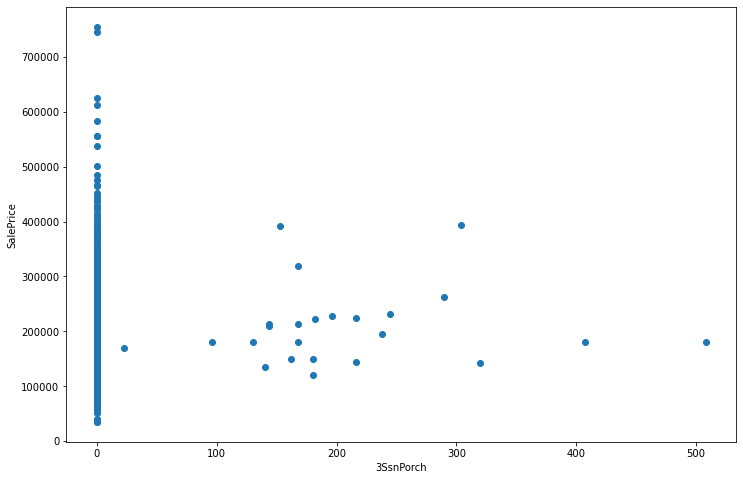

ScreenPorch 20


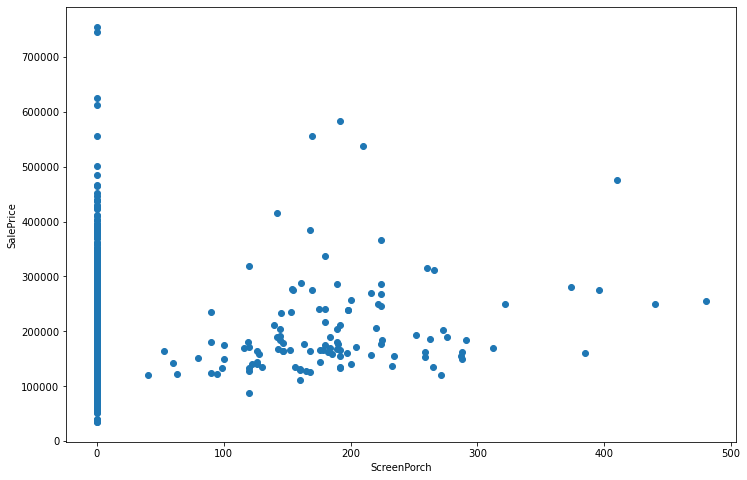

MiscVal 21


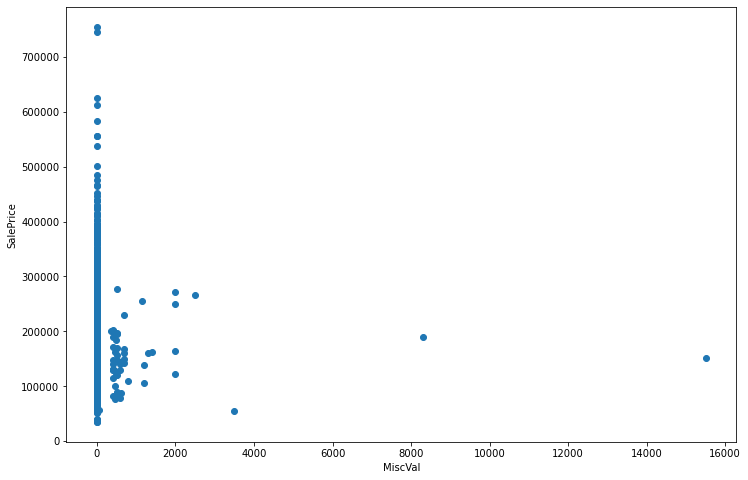

In [153]:
if plot:
    i=0
    for f in cat_features:
        grouped=train.groupby(f)
        if len(grouped.groups)>=20:
            print(f,i)
            i+=1
            fig=plt.figure(figsize=(12,8))
            plt.scatter(train[f],train[label])
            plt.xlabel(f)
            plt.ylabel(label)
            plt.show()

##### Plotting categorical/ordinal features

MSSubClass 0


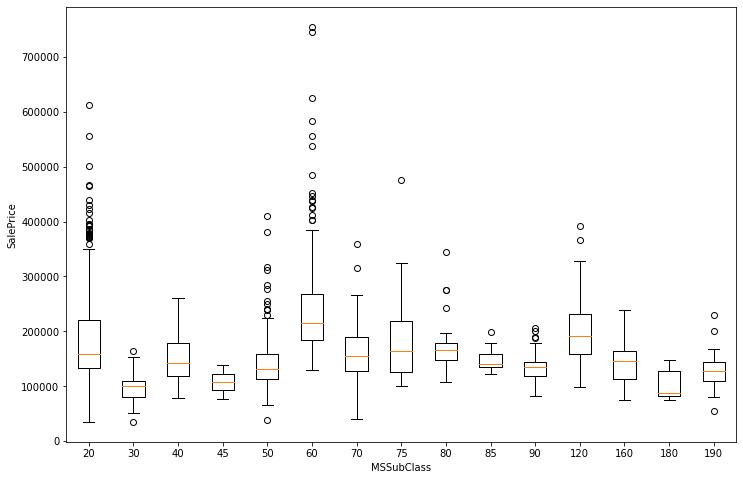

MSZoning 1


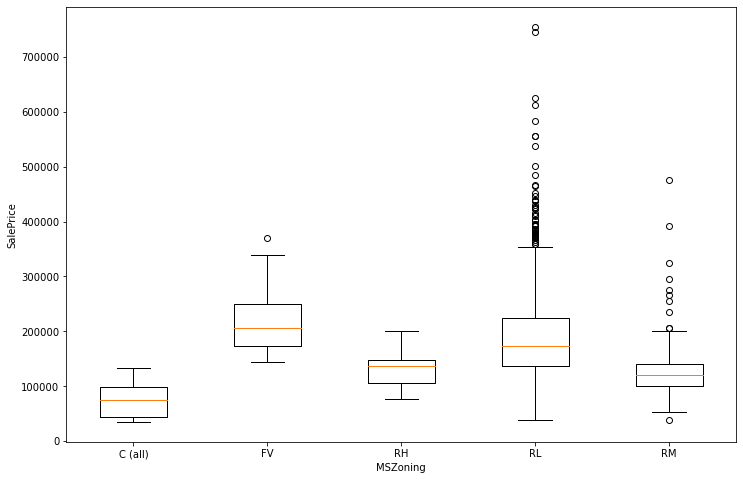

Street 2


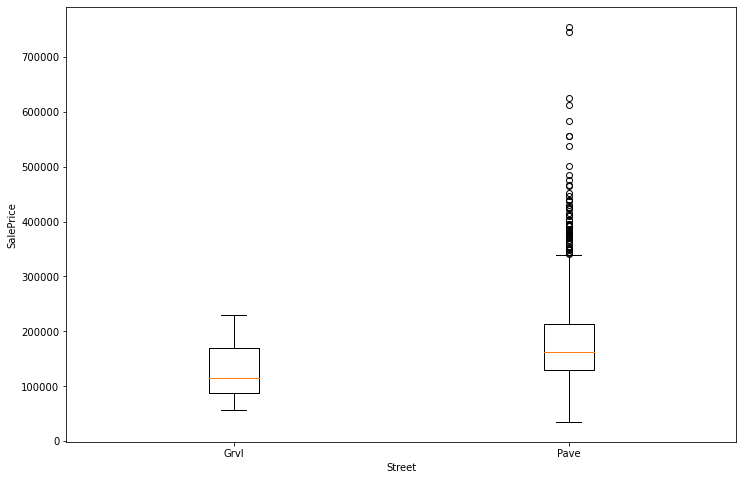

Alley 3


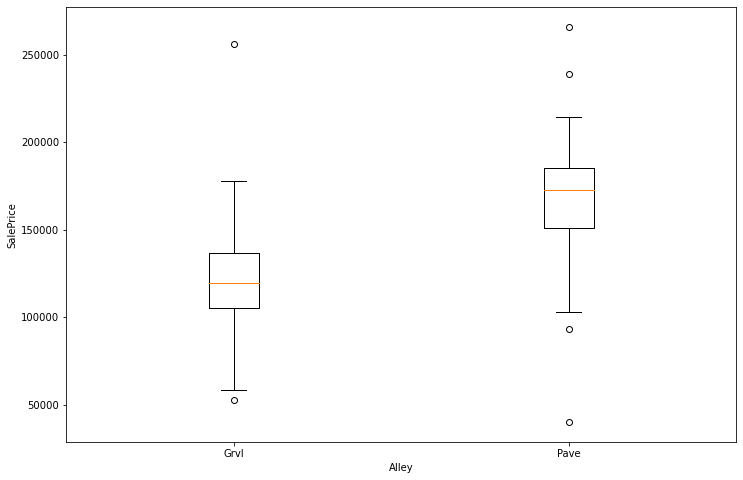

LotShape 4


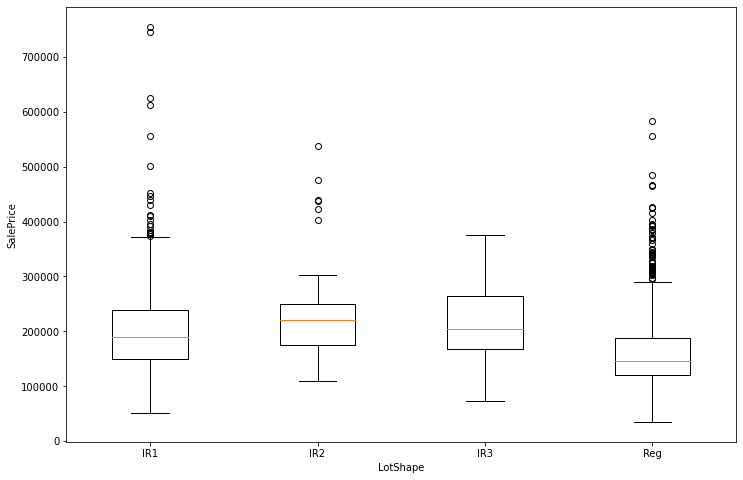

LandContour 5


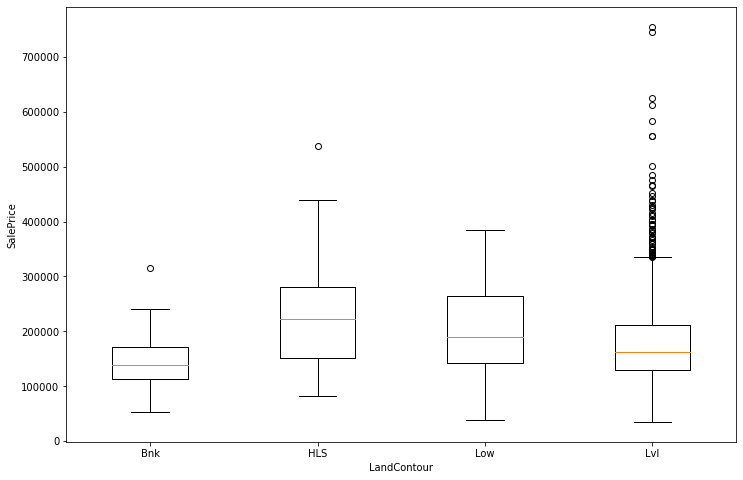

Utilities 6


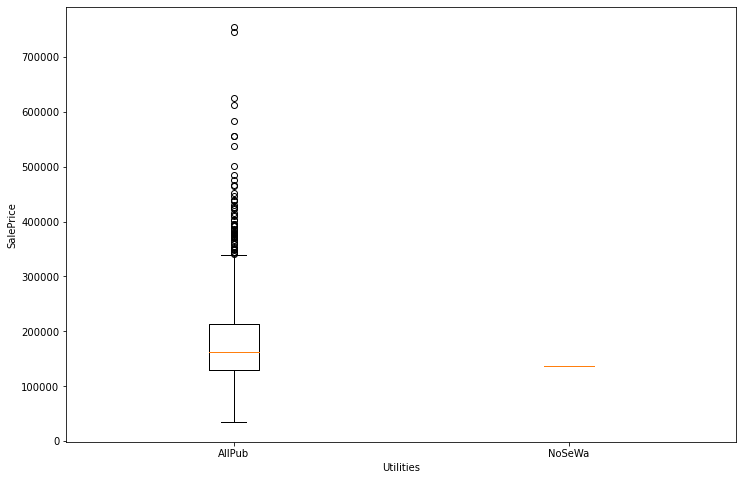

LotConfig 7


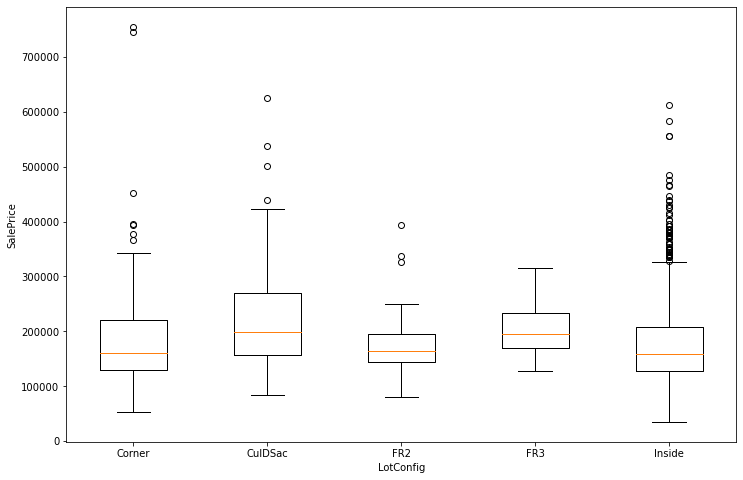

LandSlope 8


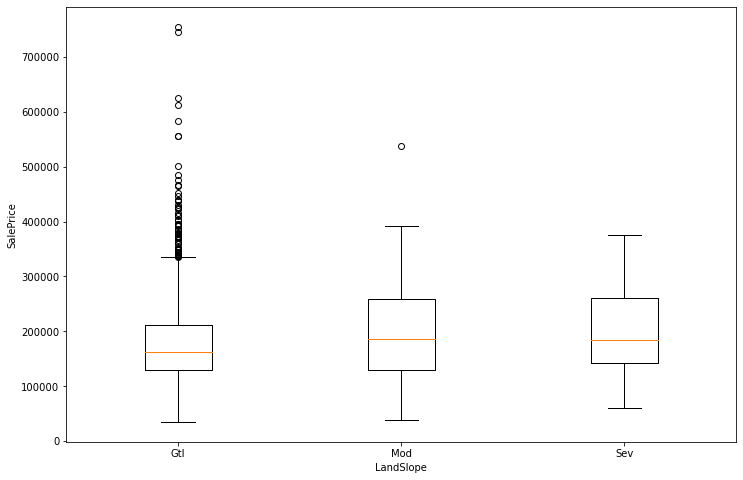

Condition1 9


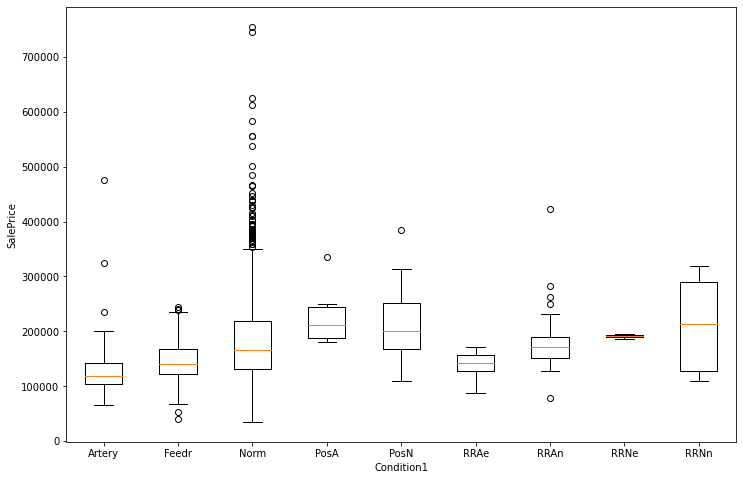

Condition2 10


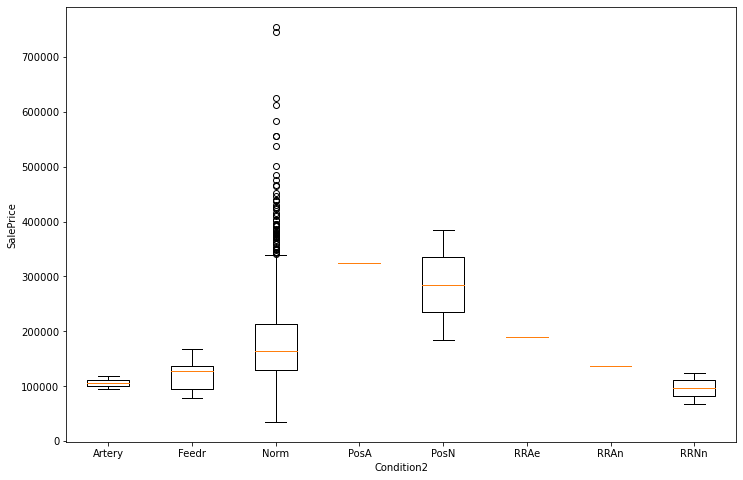

BldgType 11


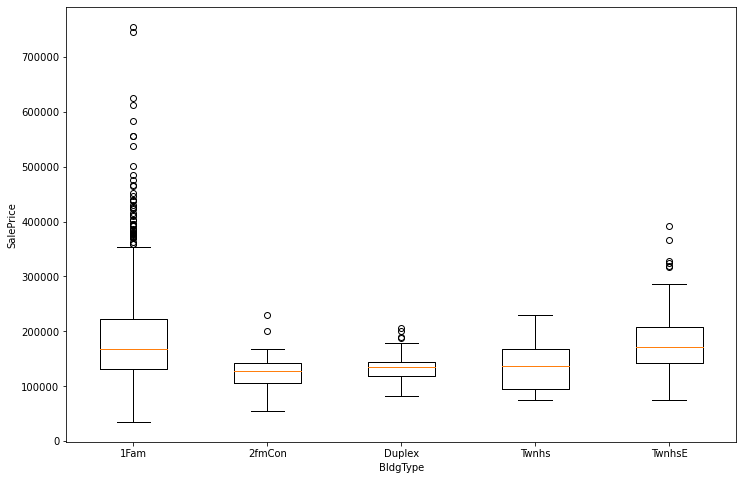

HouseStyle 12


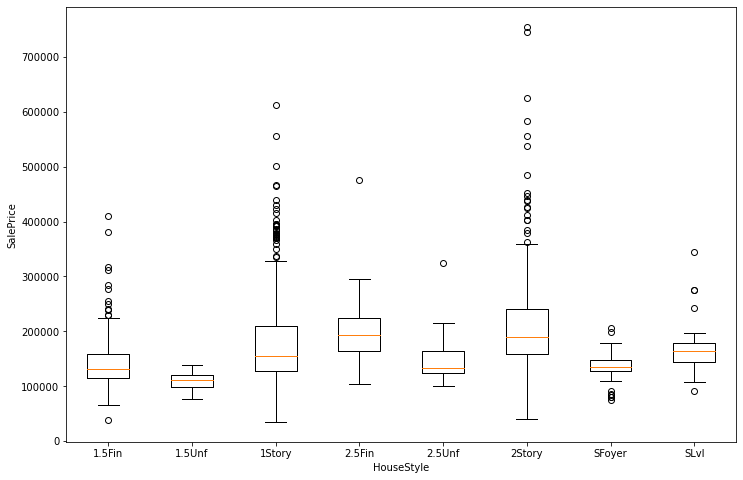

OverallQual 13


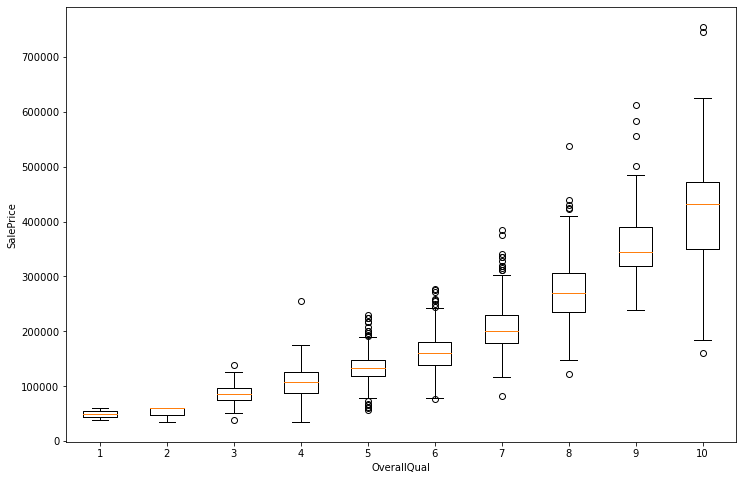

OverallCond 14


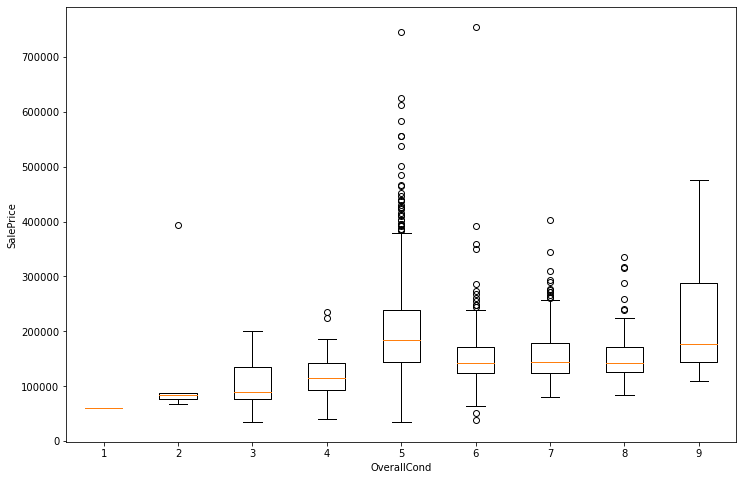

RoofStyle 15


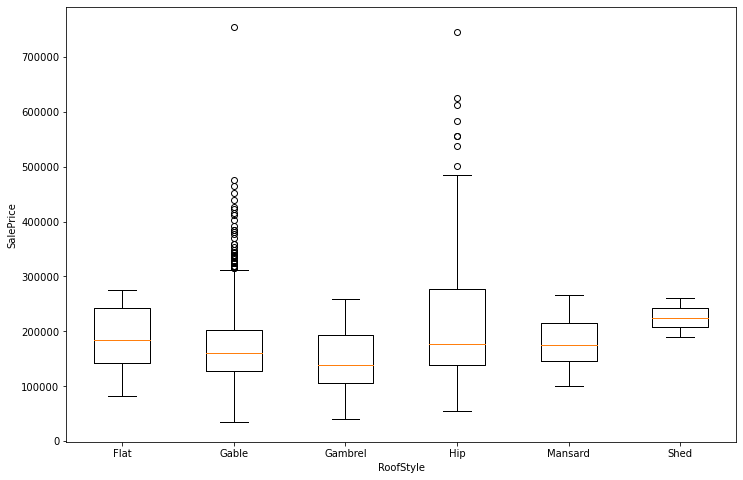

RoofMatl 16


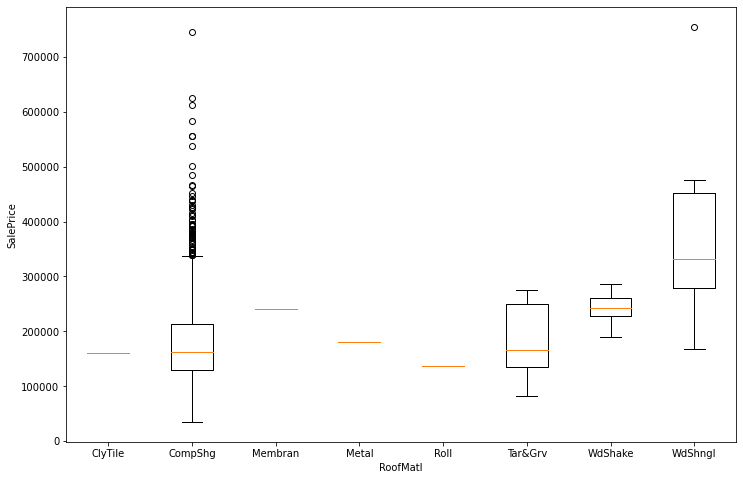

Exterior1st 17


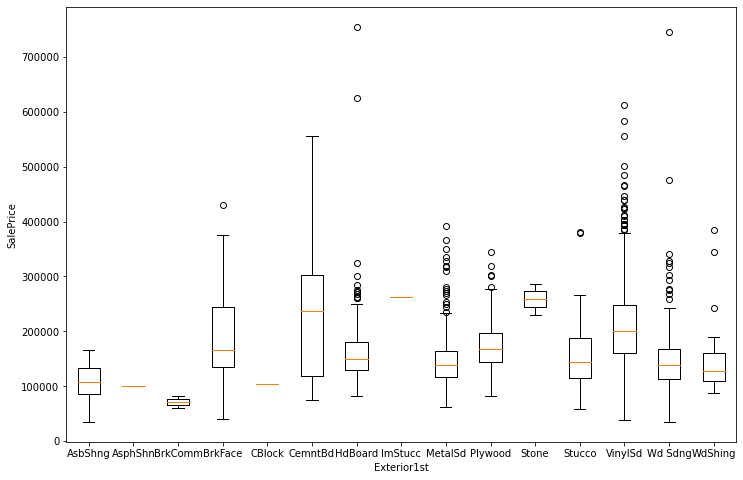

Exterior2nd 18


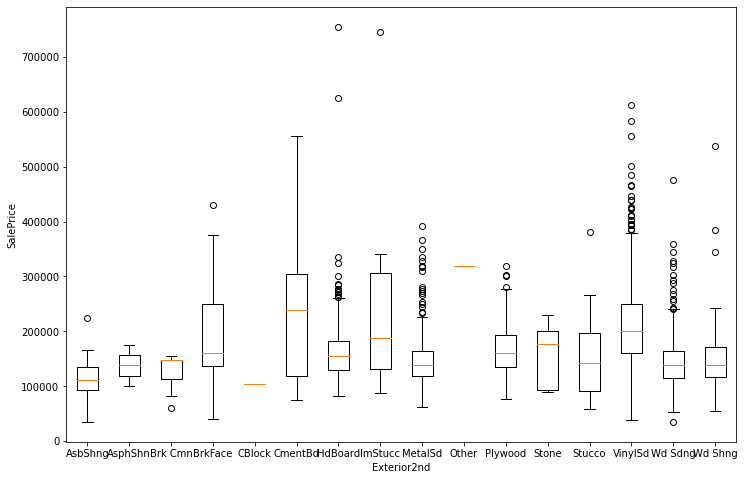

MasVnrType 19


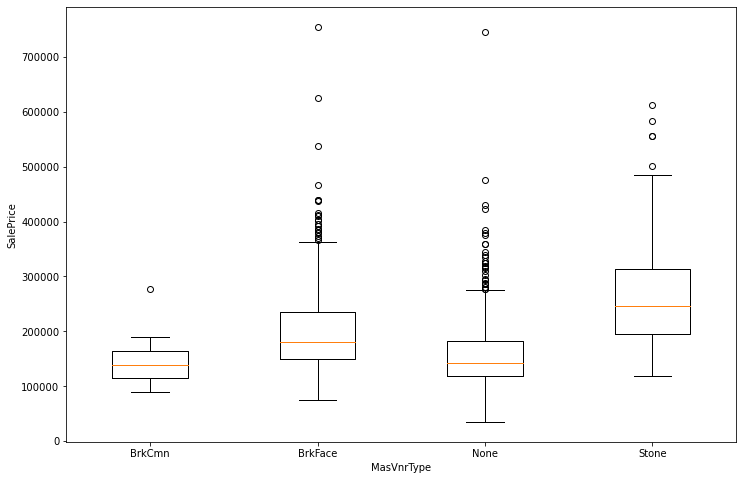

ExterQual 20


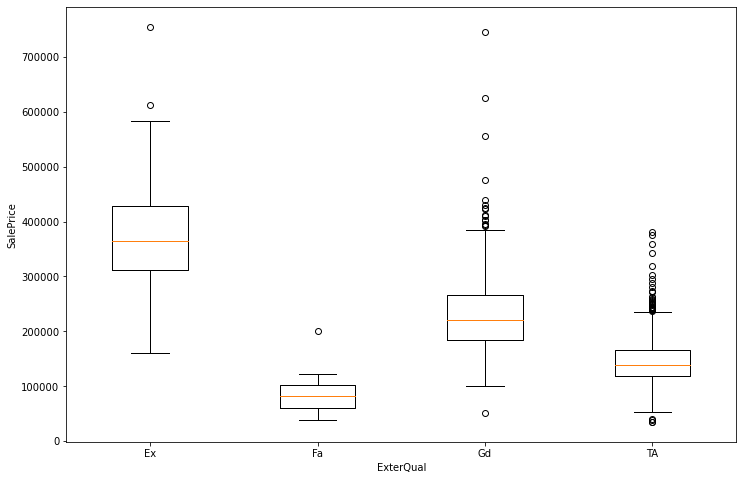

ExterCond 21


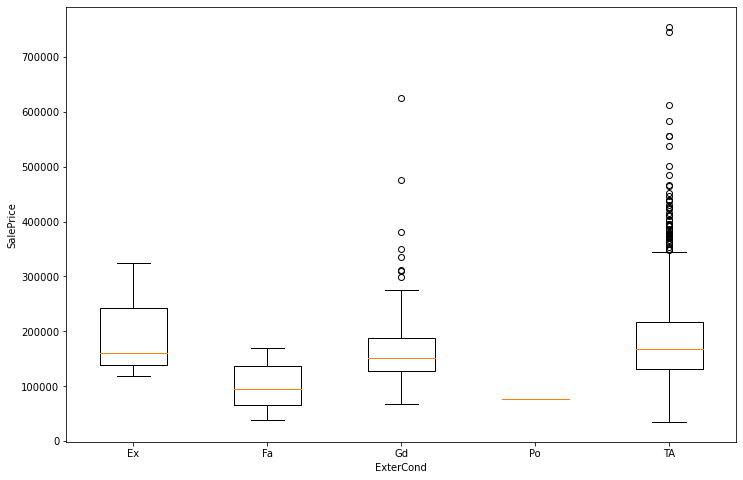

Foundation 22


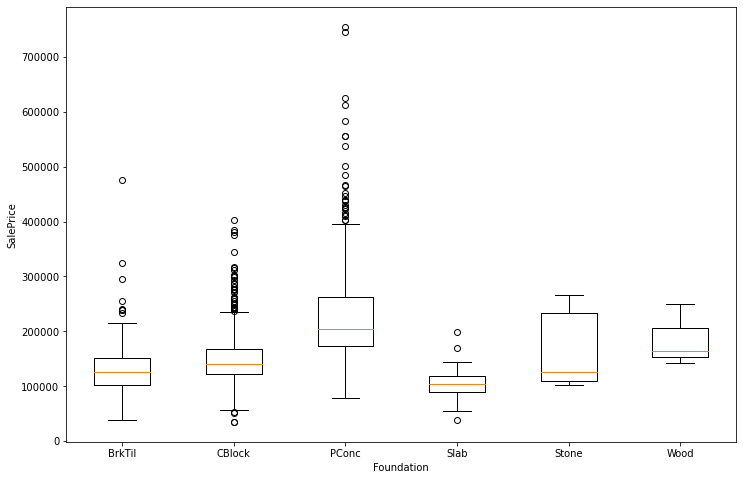

BsmtQual 23


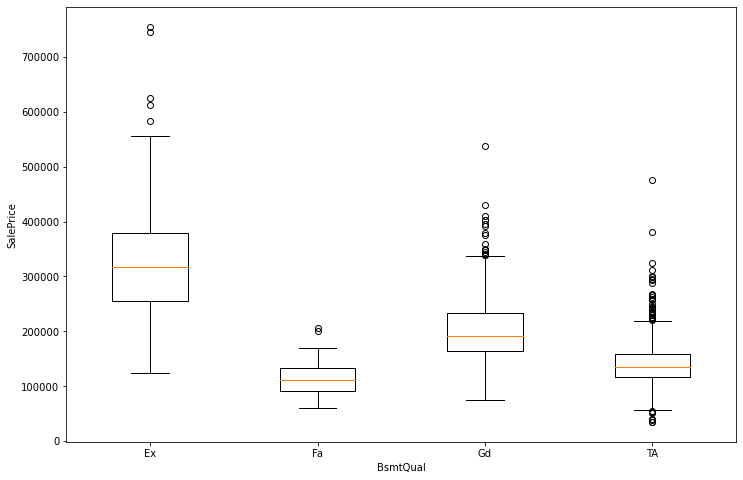

BsmtCond 24


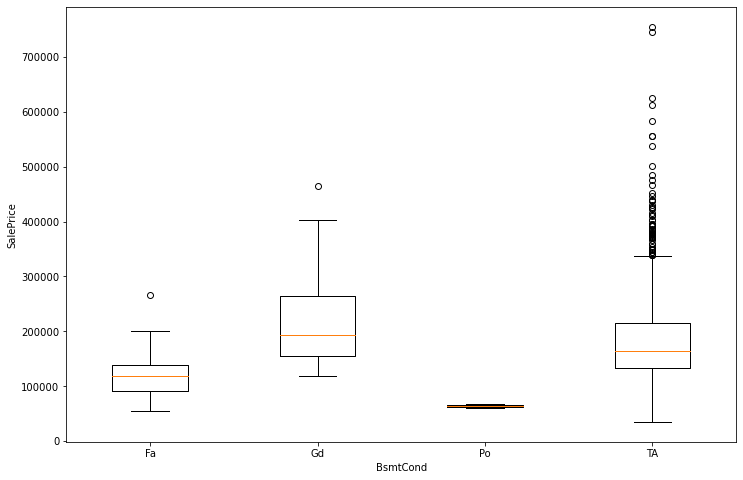

BsmtExposure 25


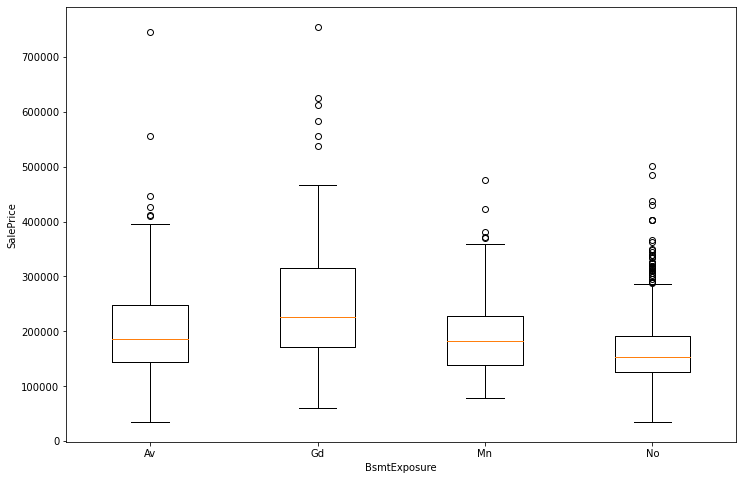

BsmtFinType1 26


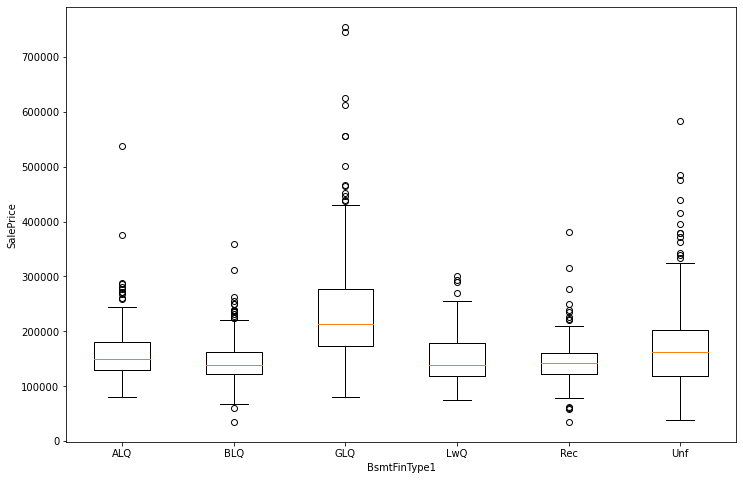

BsmtFinType2 27


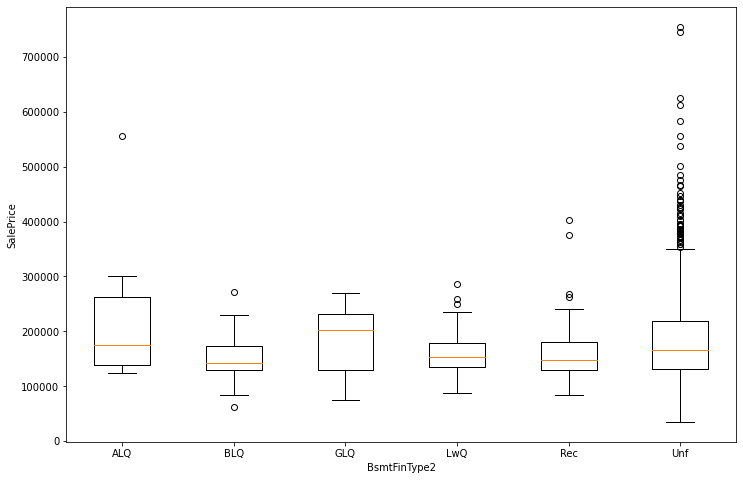

Heating 28


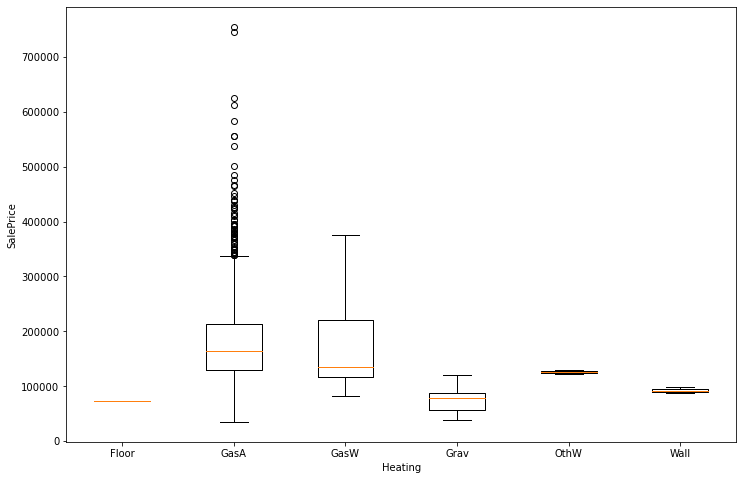

HeatingQC 29


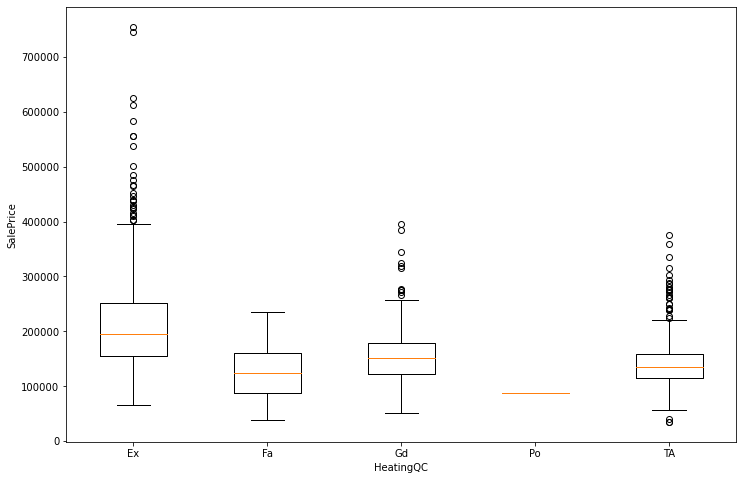

CentralAir 30


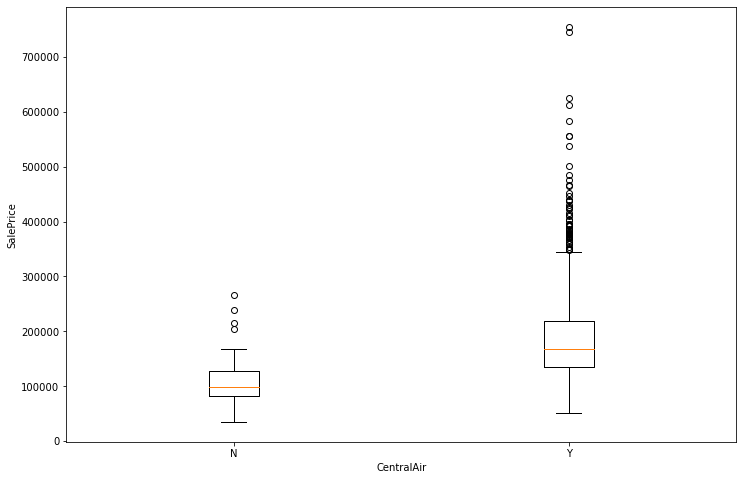

Electrical 31


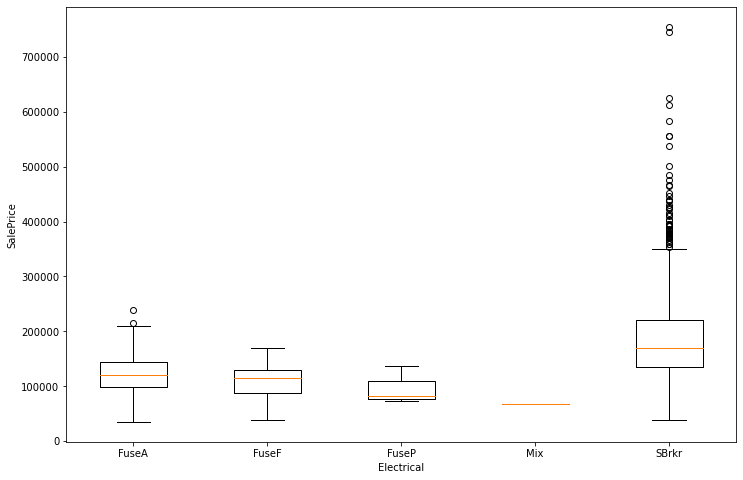

BsmtFullBath 32


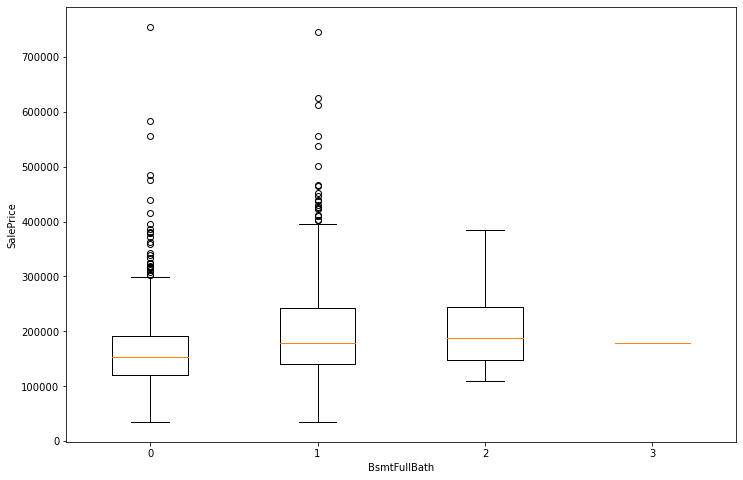

BsmtHalfBath 33


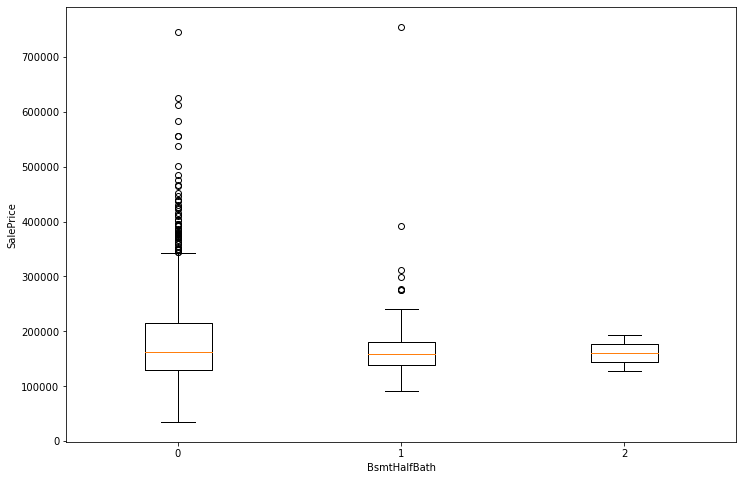

FullBath 34


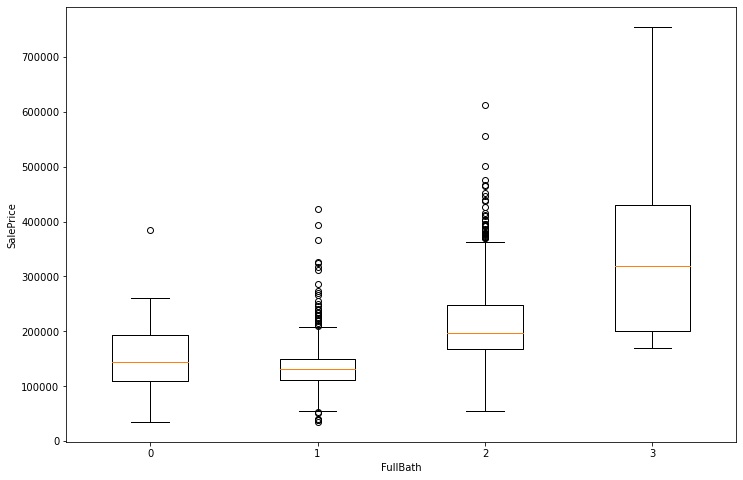

HalfBath 35


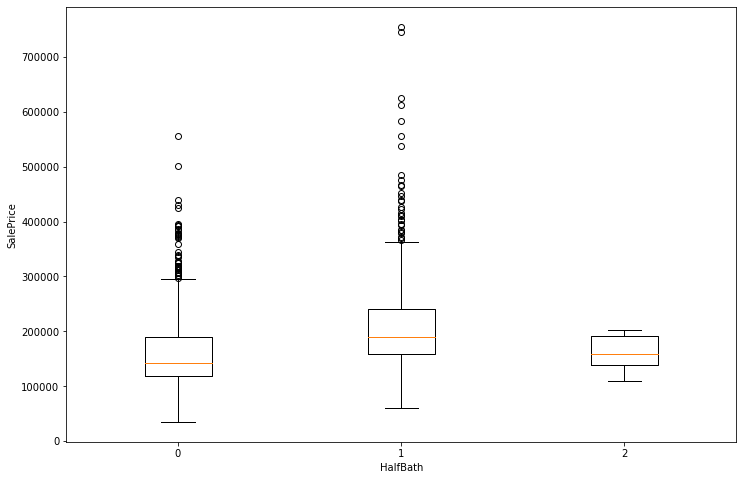

BedroomAbvGr 36


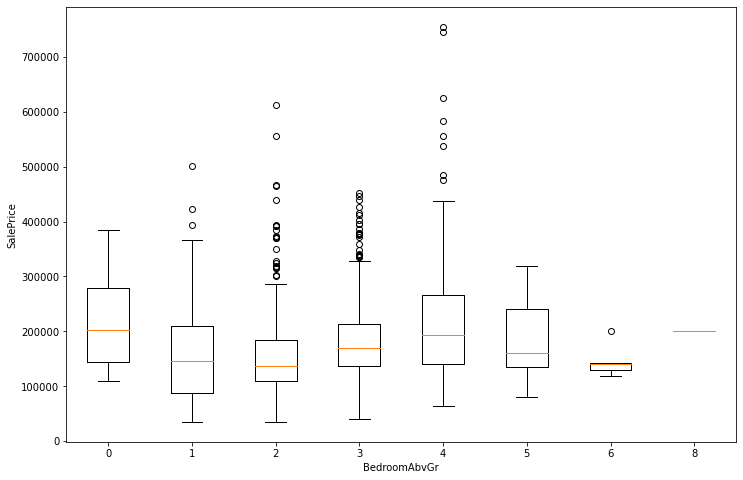

KitchenAbvGr 37


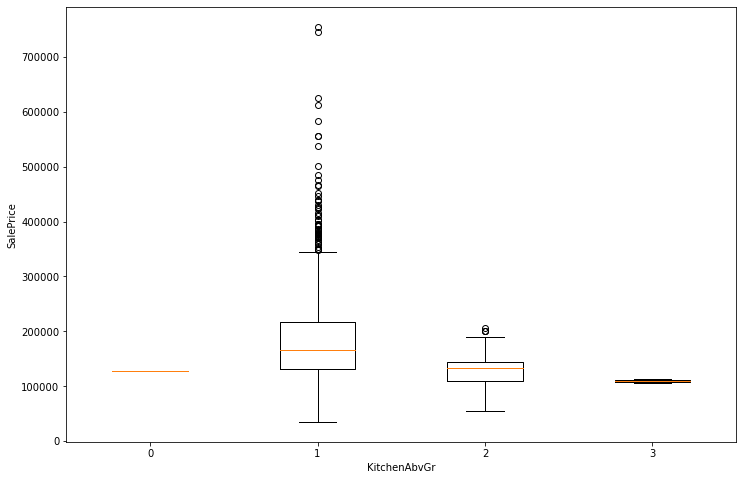

KitchenQual 38


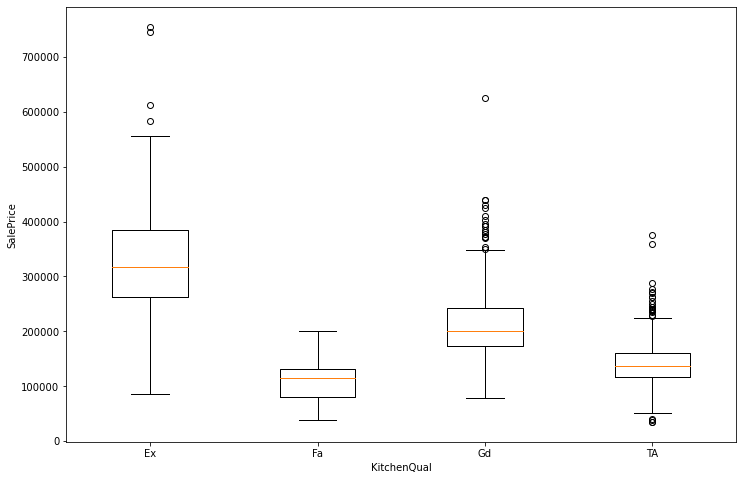

TotRmsAbvGrd 39


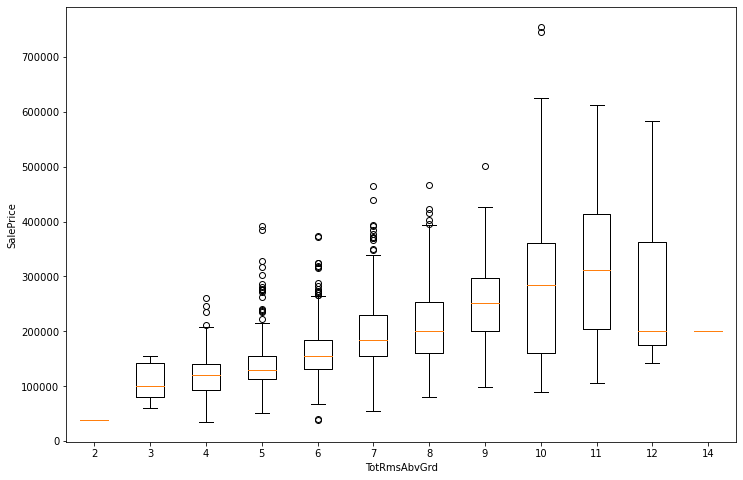

Functional 40


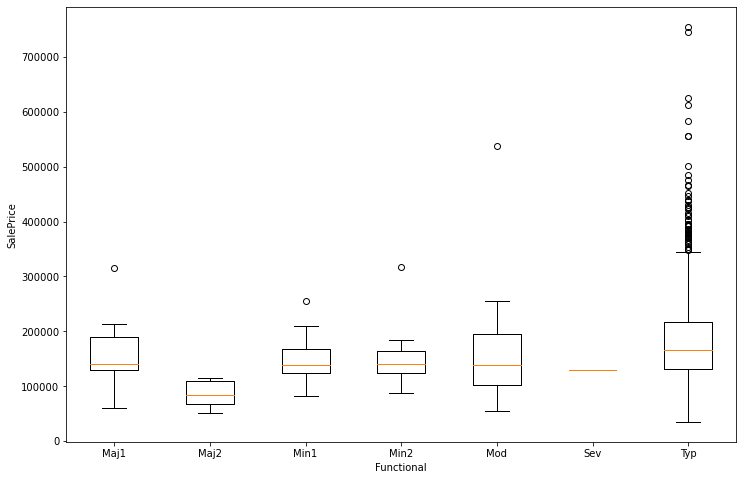

Fireplaces 41


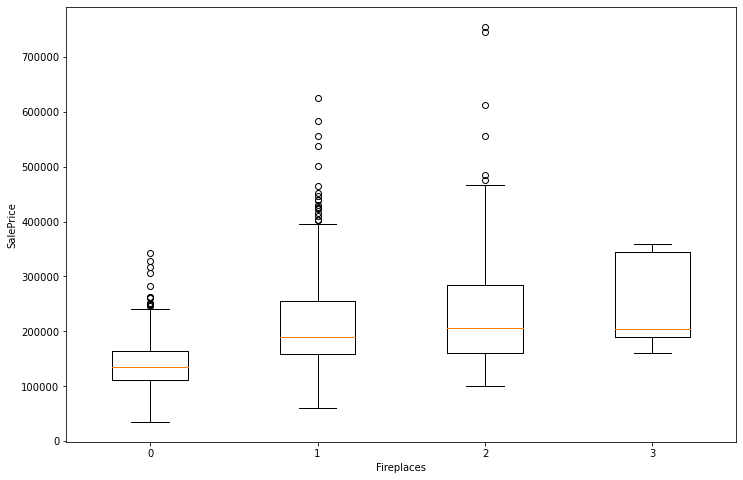

FireplaceQu 42


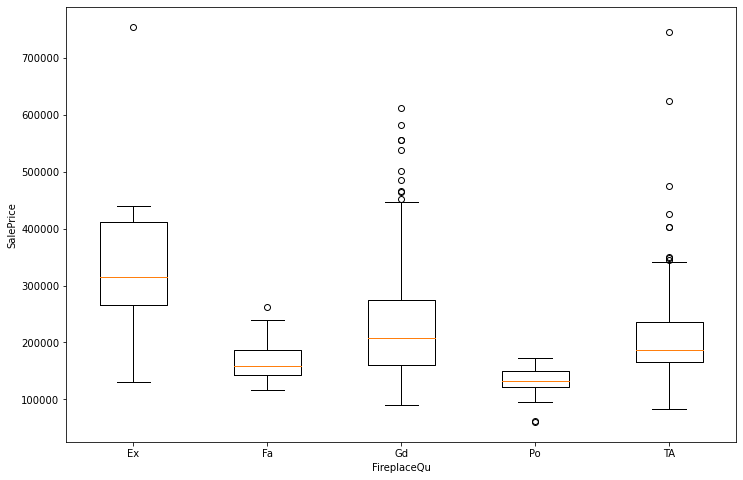

GarageType 43


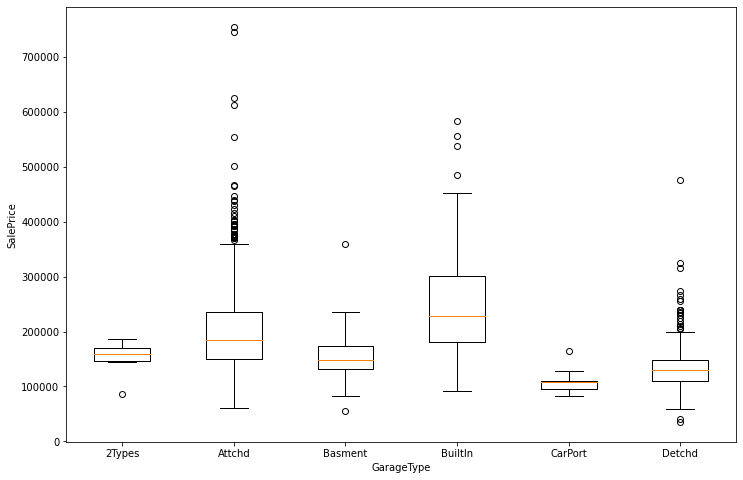

GarageFinish 44


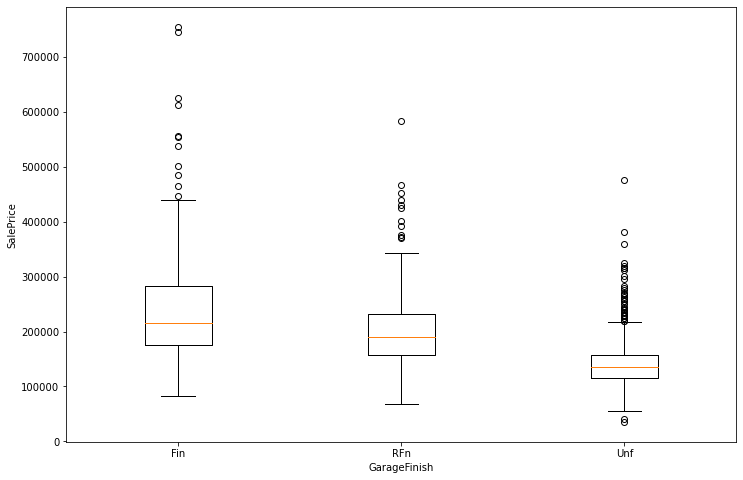

GarageCars 45


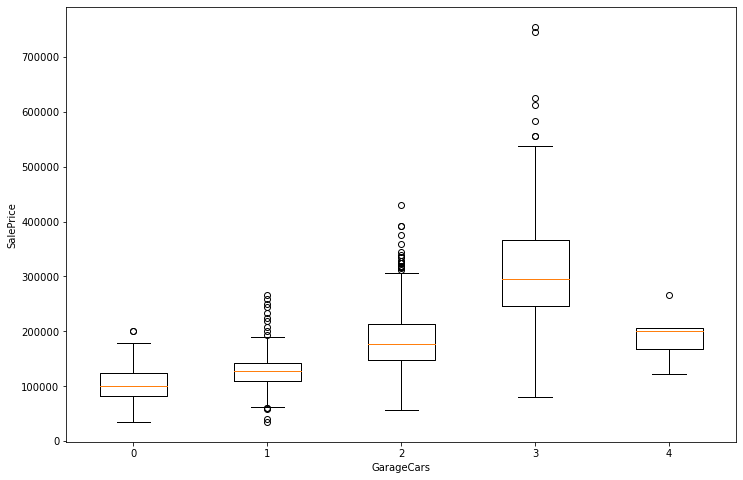

GarageQual 46


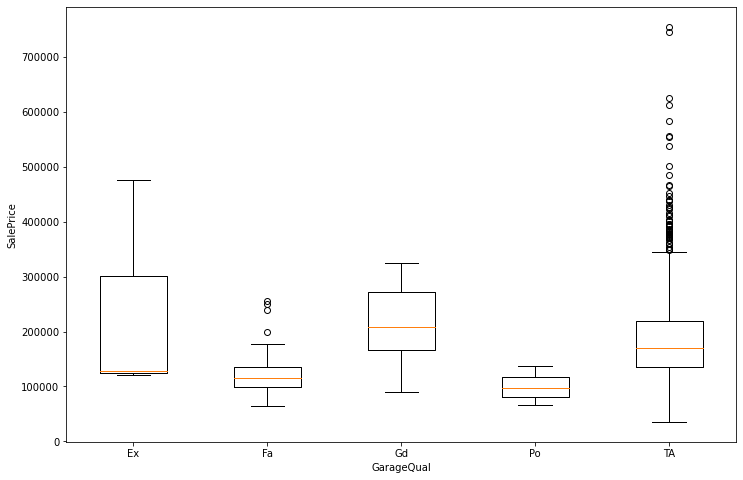

GarageCond 47


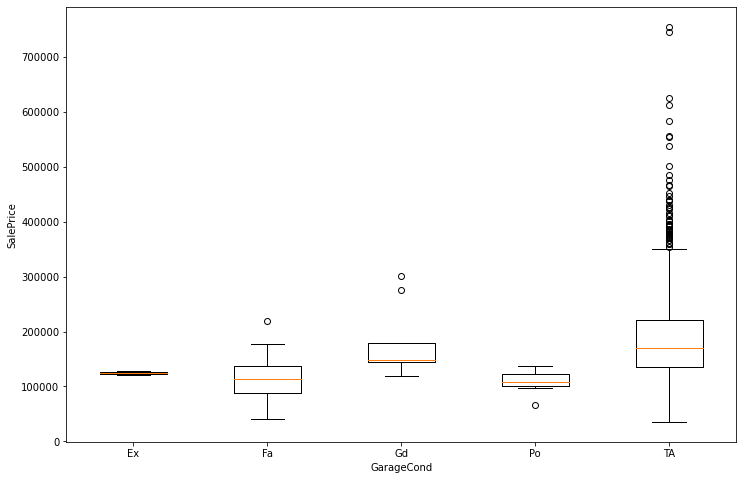

PavedDrive 48


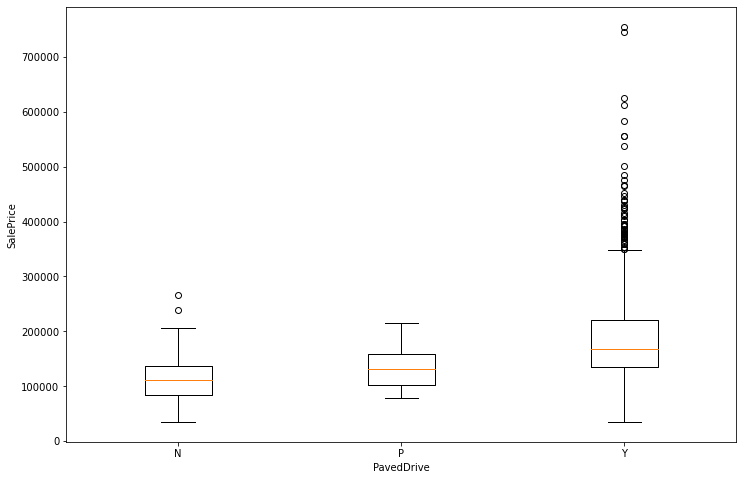

3SsnPorch 49


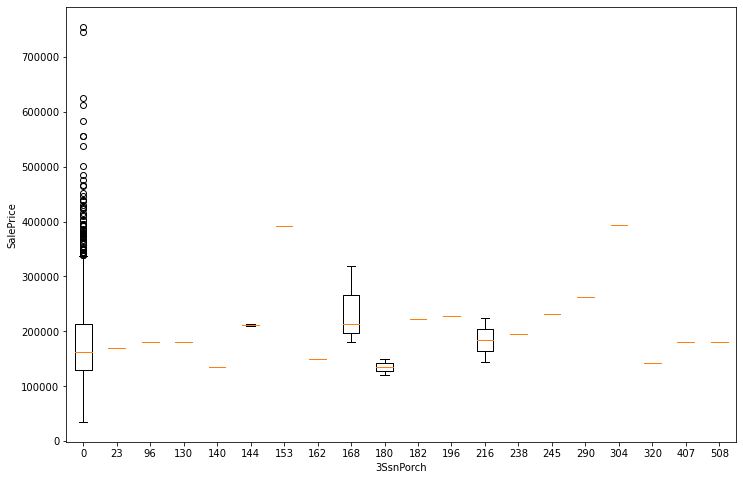

PoolArea 50


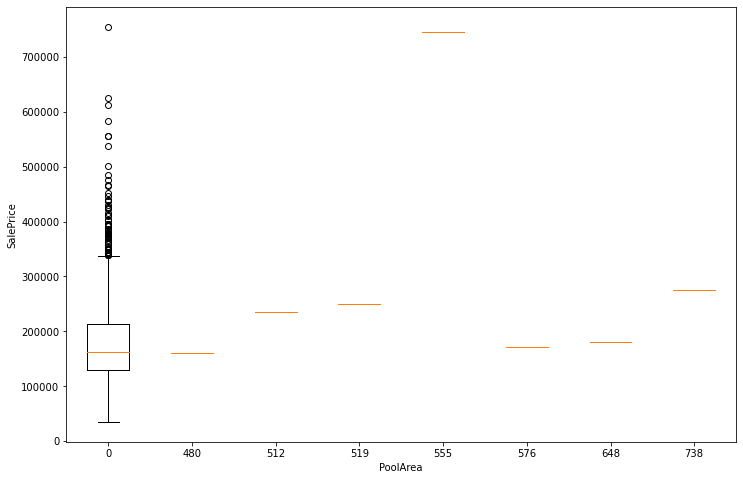

PoolQC 51


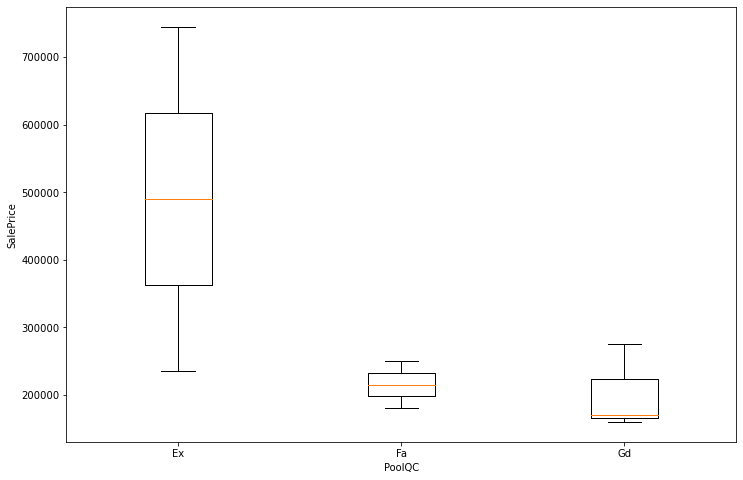

Fence 52


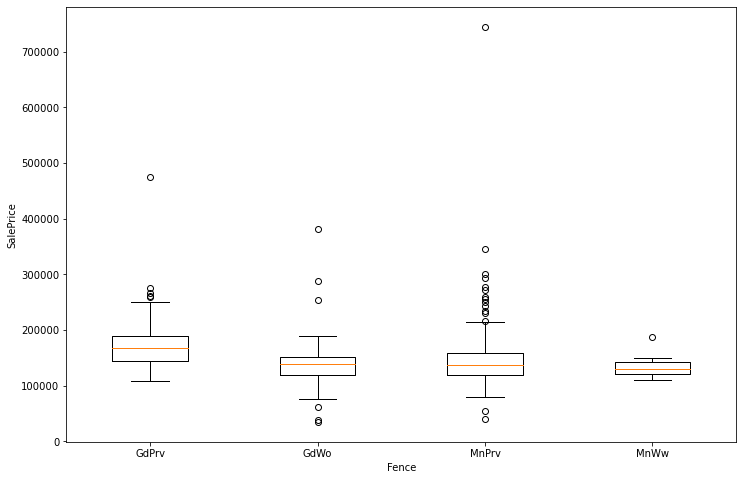

MiscFeature 53


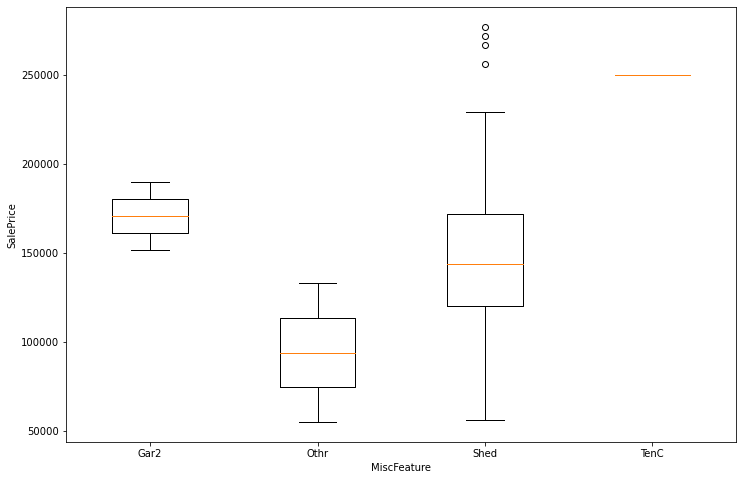

MoSold 54


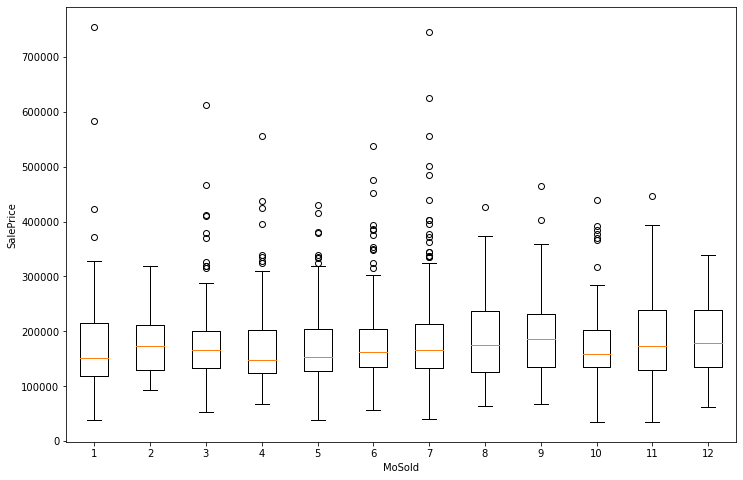

YrSold 55


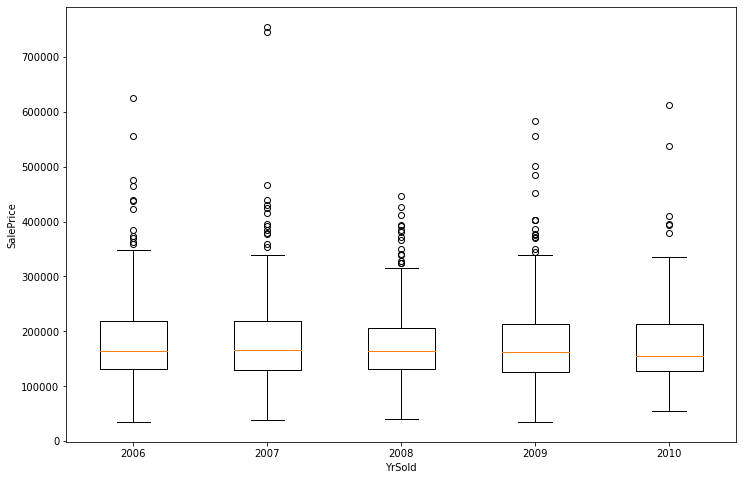

SaleType 56


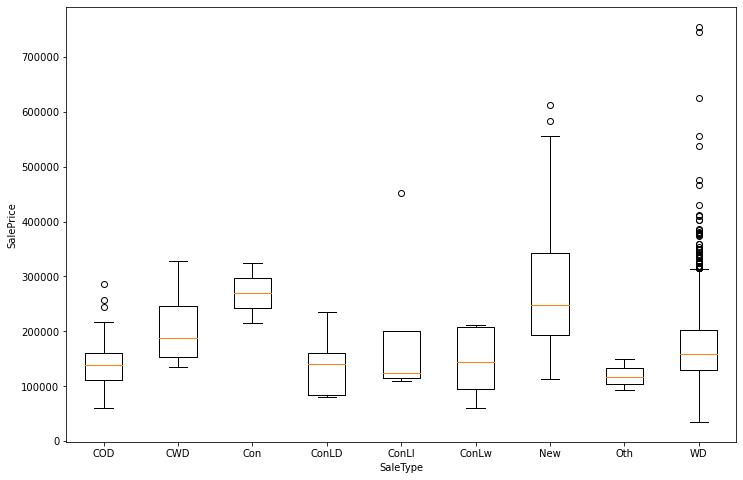

SaleCondition 57


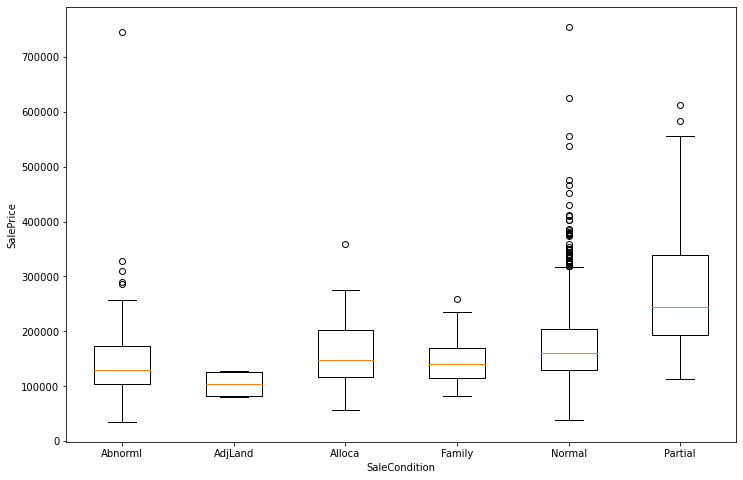

In [154]:
if plot:
    i=0
    for f in cat_features:
        grouped=train.groupby(f)
        if len(grouped.groups)<=20:
            print(f,i)
            i+=1
            plot_categorical(f,label,train)
    '''    else:
            fig=plt.figure(12,8)
            plt.scatter(train[f],train[label])'''

Let's see if we can do some feature engineering.

First: find if there are nan entries:

In [155]:
subset_df = train.loc[:, train.isnull().any()]

subset_df

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [156]:
count=train.isna().sum()
count=pd.DataFrame(count)
count[count[0]!=0]

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


#### Selecting the interesting features

In [157]:
int_cat_f=['SaleCondition','TotRmsAbvGrd','ExterQual','Exterior1st','Neighborhood','GarageFinish','KitchenQual','SaleType','PoolQC']
int_num_f=['OverallQual','LotArea','LotFrontage','BsmtFinSF1','TotalBsmtSF','GrLivArea','GarageYrBlt','GarageArea']
int_ord_f=['GarageCars']

## Beginning regressions

In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import set_config
from sklearn.metrics import r2_score,make_scorer,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [159]:
#try using keras model in scikit pipeline.. or just do it all in tensorflow/keras?
from keras.wrappers.scikit_learn import KerasRegressor

In [160]:
params = {
 'regressor__learning_rate': [0.1, 0.5, 1.0],
 'regressor__n_estimators' : [50, 100, 150]
 }

In [180]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_transformer = Pipeline(steps=[
    ('inp',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

binned_transformer = Pipeline(steps=[('inp',SimpleImputer(strategy='median')),
                                    ('KBinsDiscretizer',KBinsDiscretizer(n_bins=10))])

ordinal_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, int_num_f),
        ('cat', categorical_transformer, int_cat_f),
        ('ord', ordinal_transformer, int_ord_f)
        ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])

In [181]:
score = make_scorer(r2_score)

gridsearch=GridSearchCV(estimator=pipeline,param_grid=params,scoring=score)


In [182]:

#
x,y=train[int_cat_f+int_num_f+int_ord_f],train[label]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)


In [183]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['OverallQual', 'LotArea',
                                                   'LotFrontage', 'BsmtFinSF1',
                                                   'TotalBsmtSF', 'GrLivArea',
                                                   'GarageYrBlt',
                                                   'GarageArea']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SaleCondition',
                                                   'TotRmsAbvGrd', 'ExterQual',
                                                   'Exterior1st',
                                                   'Neighborhood',
                                                   'GarageFinish',
                                                   'KitchenQual', 'SaleType',
                                                   'PoolQC']),
                                                 ('ord',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['GarageCars'])])),
                ('regressor', GradientBoostingRegressor())])

In [184]:
model1=gridsearch.fit(x_train,(y_train))

In [185]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

In [186]:
# fit the pipeline to train a RandomForestRegressor model on the training set
model2 = pipeline.fit(x_train, (y_train))


In [187]:
predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)


In [192]:
predictions=predictions1


r2 coefficient:  0.8435535543600967 
msle =  0.019449709153442036


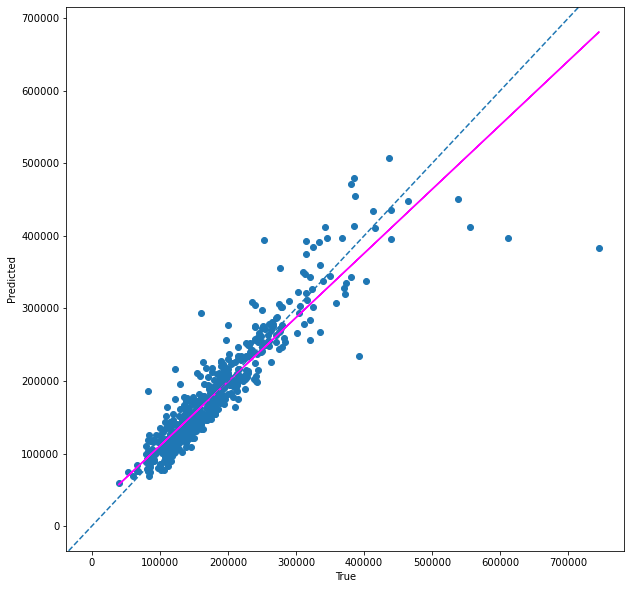

In [193]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,predictions)
plt.xlabel('True')
plt.ylabel('Predicted')
msle=mean_squared_log_error(y_true=y_test, y_pred=predictions)
r2=r2_score(y_true=y_test, y_pred=predictions)
print('r2 coefficient: ',r2,'\nmsle = ', msle)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.axline((0,0),slope=1,ls='--')
plt.show()

## Now make predictions on the test dataset

In [190]:
sample_sub=pd.read_csv('sample_submission.csv')
sample_sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


### Make prediction and save

In [191]:
#make prediction on the test set and save
pred=model1.predict(test)


ValueError: Found unknown categories [5.0, nan] in column 0 during transform

In [ ]:
write=True

In [ ]:
out_df=pd.read_csv('sample_submission.csv')
out_df['SalePrice']=pred
if write:
    out_df.to_csv('prediction.csv',index=False)